


James Bay Coordinates
53°30′N 80°30′W



In [161]:

#data related libraries
import numpy as np
import netCDF4 as nc
import glob

#plotting related libraries
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()                
from mpl_toolkits.axes_grid1 import make_axes_locatable

    

In [83]:
# Setting up model parameters based on Hudson Bay and James Bay locations. 
            
Hudson_bay = False           # Boolean if using Hudson Bay vs James Bay locations.
depth = 0                    # z axis location from 50 unit "depth" 
                        
if Hudson_bay: 
    x_range = (330,500)      # x axis range related to Longitude range for Hudson Bay
    y_range = (20,120)       # y axis range related to Latitude range for Hudson Bay
else:
    x_range = (335,390)      # x axis range related to Longitude range for James Bay 
    y_range = (55,105)       # y axis range related to Latitude range for James Bay
    

In [165]:
# Reading ANHA4 mask data
mask = nc.Dataset("../Test_Data/ANHA4_mask.nc")

# Extracting mask data for given depth
tmask = mask['tmask'][0][depth]

# Creating mask frame to use in given location. 
surf_mask = np.zeros(np.shape(tmask))

# Populating mask array with nan values where there is ocean model data, to effectively mask the surface.
for i in range(x_range[0], x_range[1]):
    for j in range(y_range[0], y_range[1]):
        if tmask[i][j] == 1.:
            surf_mask[i][j] = np.nan

            
surf_mask = surf_mask[x_range[0]:x_range[1],y_range[0]:y_range[1]]


In [169]:

glob.glob('../Test_Data/*gridT.nc')


TypeError: glob() got an unexpected keyword argument 'order'

In [132]:
# Reading ANHA4 data
#test_data = nc.Dataset("../Test_Data/ANHA4-EPM111_y1998m04d05_gridT.nc")
#test_data = nc.Dataset("../Test_Data/ANHA4-EPM111_y1998m06d04_gridT.nc")
test_data = nc.Dataset("../Test_Data/ANHA4-EPM111_y1998m08d03_gridT.nc")
test_data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: ANHA4-EPM111
    description: ocean T grid variables
    title: ocean T grid variables
    Conventions: CF-1.6
    timeStamp: 2021-Apr-30 07:49:03 EDT
    dimensions(sizes): axis_nbounds(2), x_grid_T(544), y_grid_T(800), deptht(50), x_grid_W(544), y_grid_W(800), depthw(50), time_counter(1)
    variables(dimensions): float32 nav_lat_grid_T(y_grid_T, x_grid_T), float32 nav_lon_grid_T(y_grid_T, x_grid_T), float32 deptht(deptht), float32 deptht_bounds(deptht, axis_nbounds), float32 nav_lat_grid_W(y_grid_W, x_grid_W), float32 nav_lon_grid_W(y_grid_W, x_grid_W), float32 depthw(depthw), float32 depthw_bounds(depthw, axis_nbounds), float32 votemper(time_counter, deptht, y_grid_T, x_grid_T), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter, axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter, axis_nbounds), float32 vosaline(time_co

In [133]:
test_var = test_data['votemper'][:]
lat = test_data['nav_lat_grid_T'][:]
lon = test_data['nav_lon_grid_T'][:]

print(lon.shape)
print(lat.shape)
print(test_var.shape)


(800, 544)
(800, 544)
(1, 50, 800, 544)


In [139]:

import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

new_cmap = truncate_colormap(plt.get_cmap('coolwarm'), 0.25, 0.8)



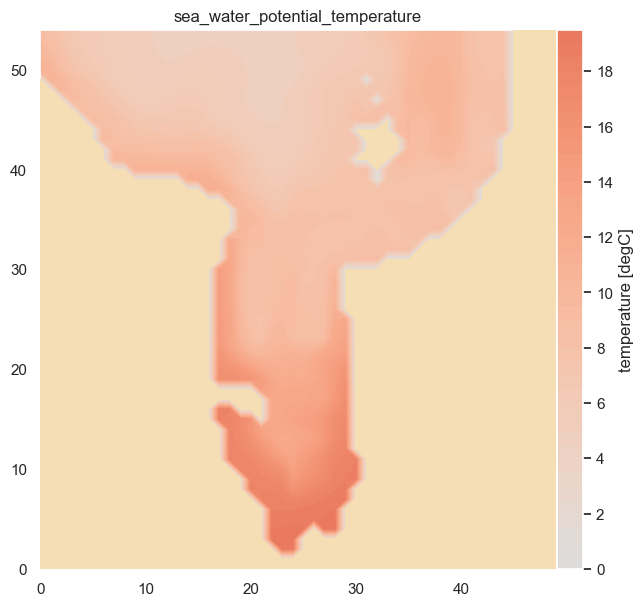

In [157]:
#fig, ax = plt.figure(figsize=(10,10))
fig, ax = plt.subplots(1,1, figsize=[7,7])

depth = 0

# Setting ploting vars.
levels = 42
vmax = test_var[0,depth,x_range[0]:x_range[1],y_range[0]:y_range[1]].max() 
vmin = test_var[0,depth,x_range[0]:x_range[1],y_range[0]:y_range[1]].min() 

#plotting data

#plotting filled countour regions 
#im = ax.contourf(test_var[0,depth,x_range[0]:x_range[1],y_range[0]:y_range[1]],levels=levels,cmap='coolwarm')
im = ax.contourf(test_var[0,depth,x_range[0]:x_range[1],y_range[0]:y_range[1]],levels=levels,cmap='coolwarm',vmin=-30.,vmax=30.)
#plt.colorbar()

#plotting countor lines.
#ax.contour(test_var[0,depth,x_range[0]:x_range[1],y_range[0]:y_range[1]],levels=levels,cmap='Greys',linewidths=.4)
#plt.contour(test_var[0,depth,x_range,20:120],levels=levels,cmap='Greys',linewidths=.2,vmin=vmin,vmax=vmax)
#plt.colorbar()


#title
#plt.title(test_data.title)
plt.title(test_data.variables['votemper'].standard_name)


divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.01)
label=test_data.variables['votemper'].long_name+' ['+test_data.variables['votemper'].units+']'
fig.colorbar(im, cax=cax, orientation='vertical',label=label)


# Surface mask.
ax.contourf(surf_mask[x_range[0]:x_range[1],y_range[0]:y_range[1]], colors= 'wheat', zorder = 3)

#
#ax.set_aspect('equal')

#plt.tight_layout()


#### plotting multiple dates

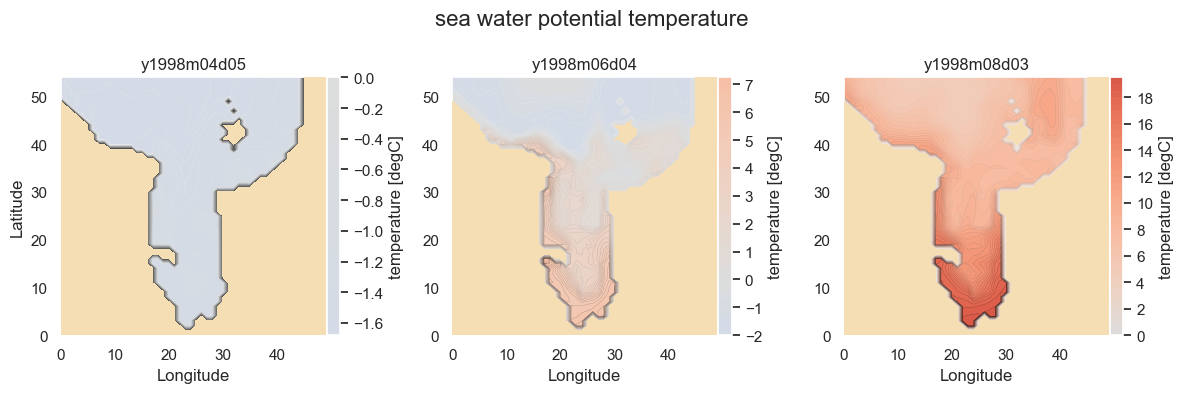

In [184]:

fig, ax = plt.subplots(ncols=3,nrows=1, figsize=[12,4])

depth = 0

# Setting ploting vars.
levels = 42
# vmax = test_var[0,depth,x_range[0]:x_range[1],y_range[0]:y_range[1]].max() 
# vmin = test_var[0,depth,x_range[0]:x_range[1],y_range[0]:y_range[1]].min() 

vmax=25.
vmin=-25.


file_list = sorted(glob.glob('../Test_Data/*gridT.nc'))


var =  'votemper'


for i, xx in enumerate(fig.axes):
        
    # Get data
    data = nc.Dataset(file_list[i])
    temp = data[var][:]

    # Cut data
    temp = temp[0,depth,x_range[0]:x_range[1],y_range[0]:y_range[1]]
    
    
    #plotting data

    #plotting filled countour regions 
    im = xx.contourf(temp,levels=levels,cmap='coolwarm',vmin=vmin,vmax=vmax)

    #plotting countor lines
    xx.contour(temp,levels=levels,cmap='Greys',linewidths=.1)
    #plt.contour(test_var[0,depth,x_range,20:120],levels=levels,cmap='Greys',linewidths=.2,vmin=vmin,vmax=vmax)
    #plt.colorbar()

    # Surface mask.
    xx.contourf(surf_mask, colors= 'wheat', zorder = 3)

    
    #Set labels
    xx.set_xlabel('Longitude')
    if i == 0:
        xx.set_ylabel('Latitude')
    #title
    #plt.title(data.variables['votemper'].standard_name)
    xx.set_title(file_list[i].split('/')[-1].split('_')[1])

    
    #colorbar
    divider = make_axes_locatable(xx)
    cax = divider.append_axes('right', size='5%', pad=0.01)
    label = data.variables[var].long_name+' ['+test_data.variables[var].units+']'
    fig.colorbar(im, cax=cax, orientation='vertical',label=label)



    
fig.suptitle(data.variables[var].standard_name.replace('_',' '), fontsize=16)
fig.tight_layout()


In [44]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [45]:
# create an Axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

data = np.arange(100, 0, -1).reshape(10, 10)

fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.imshow(data, cmap='bone')

fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()


import numpy as np
import matplotlib.pyplot as plt

data = np.arange(100, 0, -1).reshape(10, 10)

fig, ax = plt.subplots()
cax = fig.add_axes([0.27, 0.8, 0.5, 0.05])

im = ax.imshow(data, cmap='gist_earth')
fig.colorbar(im, cax=cax, orientation='horizontal')
plt.show()

plt.tight_layout()
plt.subplots_adjust(bottom=0.05)
cax = plt.axes([0.1, 0, 0.8, 0.01]) #Left,bottom, length, width
clb=plt.colorbar(cax=cax,orientation="horizontal")
clb.ax.tick_params(labelsize=8) 
clb.ax.set_title('Your Label',fontsize=8)

